# Fourier Transform
## Import

In [1]:
import librosa
import librosa.display
import numpy as np
import scipy as sp
import IPython.display as ipd
import matplotlib.pyplot as plt

## Loading files

In [2]:
audio_path = "audio/piano_c.wav"
ipd.Audio(audio_path)

In [3]:
signal, sr = librosa.load(audio_path)
signal.size, sr

(33968, 22050)

## Visualize Waveform

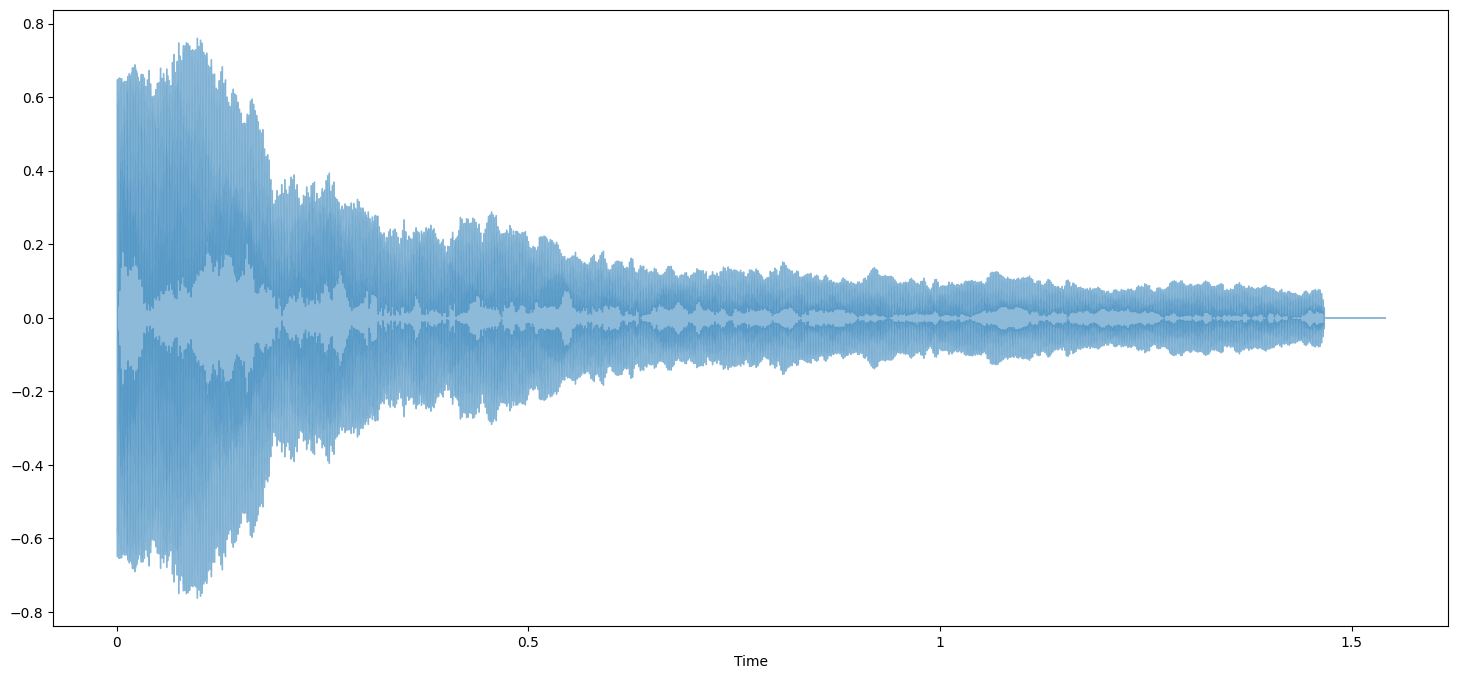

In [4]:
plt.figure(figsize=(18, 8))
librosa.display.waveshow(signal, sr=sr, alpha=0.5)
plt.show()

## Derive spectrum using FT
- `numpy.linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None, axis=0) `:
  
  返回在`start`和`stop`之间，且数量为`num`的**等差数列**

疑问：
1. 为什么ft的长度与signal的长度一样 (都是33968)？
   
    - 答：采样点的数量(signal的长度) = 频率的取值数量(ft的长度)
  
2. 为什么frequency的最大值是采样率$s_r$ (22050 $Hz$)？
   
   - 答：DFT的频率的取值空间: $F(k)=\displaystyle\frac{k}{NT}=\frac{ks_r}{N}\in[0,s_r)$
> 答案对应 [Chapter13 DFT 的笔记](../Chapter13_DiscreteFourierTransform.md)

In [5]:
ft = sp.fft.fft(signal)
magnitude = np.abs(ft)
frequency = np.linspace(0, sr, len(magnitude)) # 返回在 0 和 22050 之间，数量为33968的等差数列

In [6]:
sr, len(magnitude), len(ft), len(frequency)

(22050, 33968, 33968, 33968)

In [7]:
frequency

array([0.00000000e+00, 6.49159478e-01, 1.29831896e+00, ...,
       2.20487017e+04, 2.20493508e+04, 2.20500000e+04])

## Plot spectrum

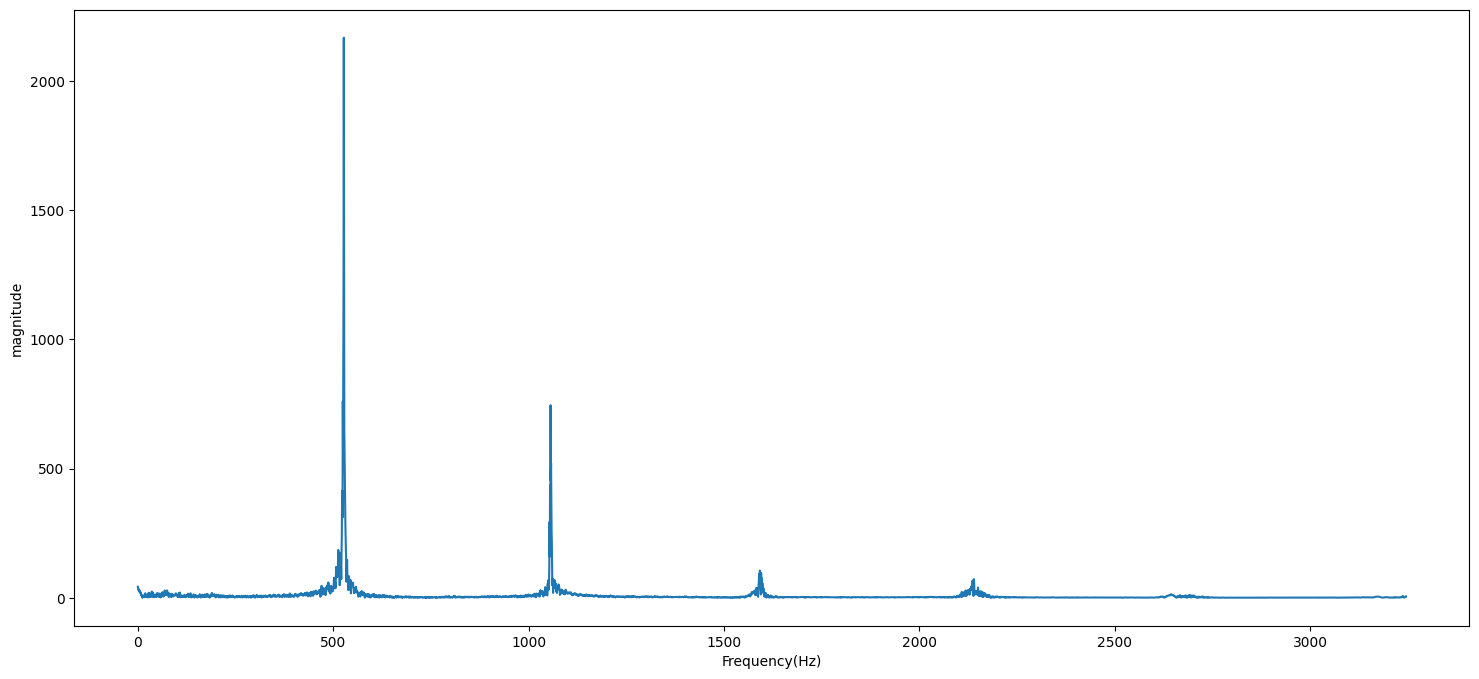

In [8]:
plt.figure(figsize=(18, 8))
# plt.figure(figsize=(18, 16))

# plt.subplot(2, 1, 1)
plt.plot(frequency[:5000], magnitude[:5000])
plt.xlabel("Frequency(Hz)")
plt.ylabel("magnitude")

# plt.subplot(2, 1, 2)
# plt.plot(frequency, magnitude)
# plt.xlabel("Frequency(Hz)")
# plt.ylabel("magnitude")
plt.show()

如上所示。第一个尖峰所在频率为基波频率，之后几个尖峰为谐波频率，谐波频率为基波频率的k倍（k是正整数）

## Visualize a sequence of 400 samples in signal

In [9]:
len(signal)

33968

In [10]:
d = 1 / sr
d

4.5351473922902495e-05

In [11]:
d_400_samples = 400 * d
d_400_samples

0.018140589569160998

In [12]:
samples = range(len(signal))
t = librosa.samples_to_time(samples, sr=sr)

[]

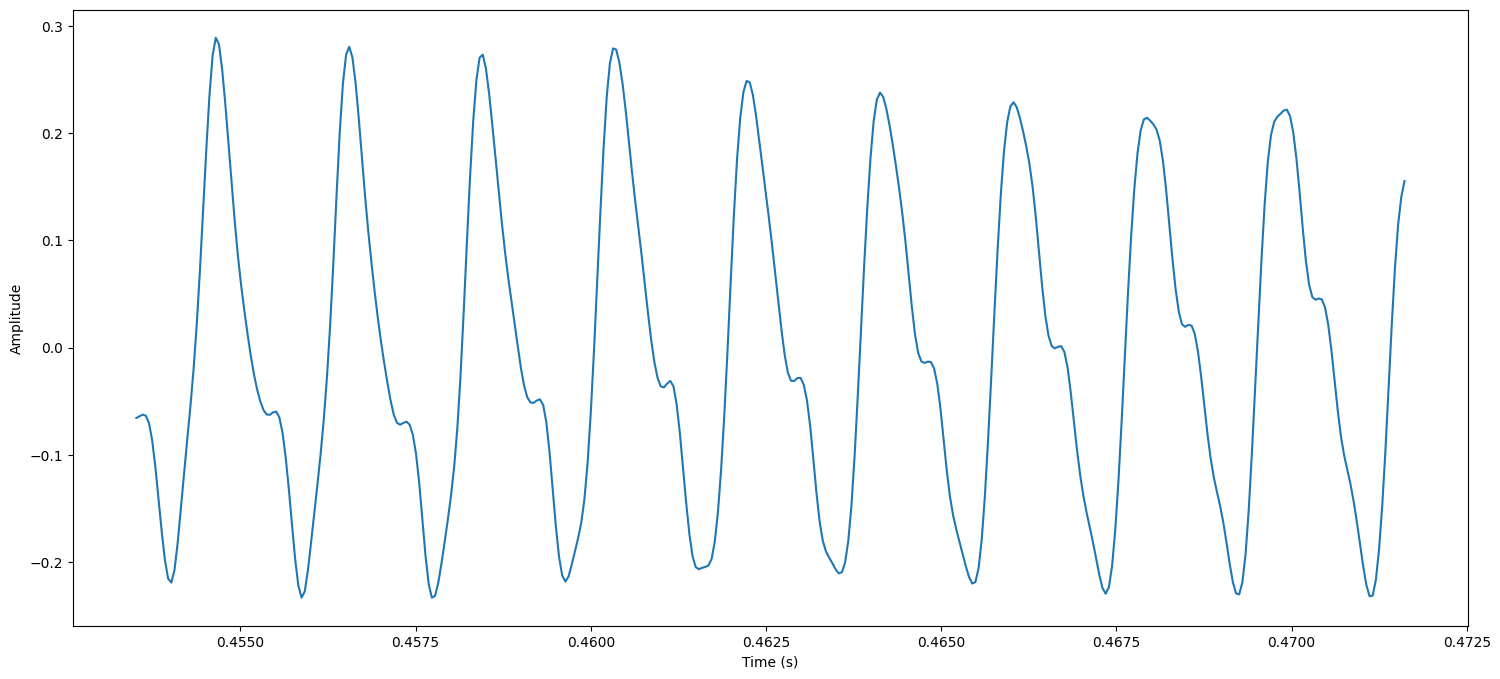

In [13]:
plt.figure(figsize=(18, 8))
plt.plot(t[10000:10400], signal[10000:10400])
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.plot()

## Create and Visualize a sinusoids
$$\huge\textnormal{use}\ \ sin(2\pi\cdot(ft-\varphi))$$

In [14]:
f = 523
phase = 0
phase2 = 1.5
sin = 0.5 * np.sin(2*np.pi*(f*t-phase))
sin2 = 0.5 * np.sin(2*np.pi*(f*t-phase2))

[]

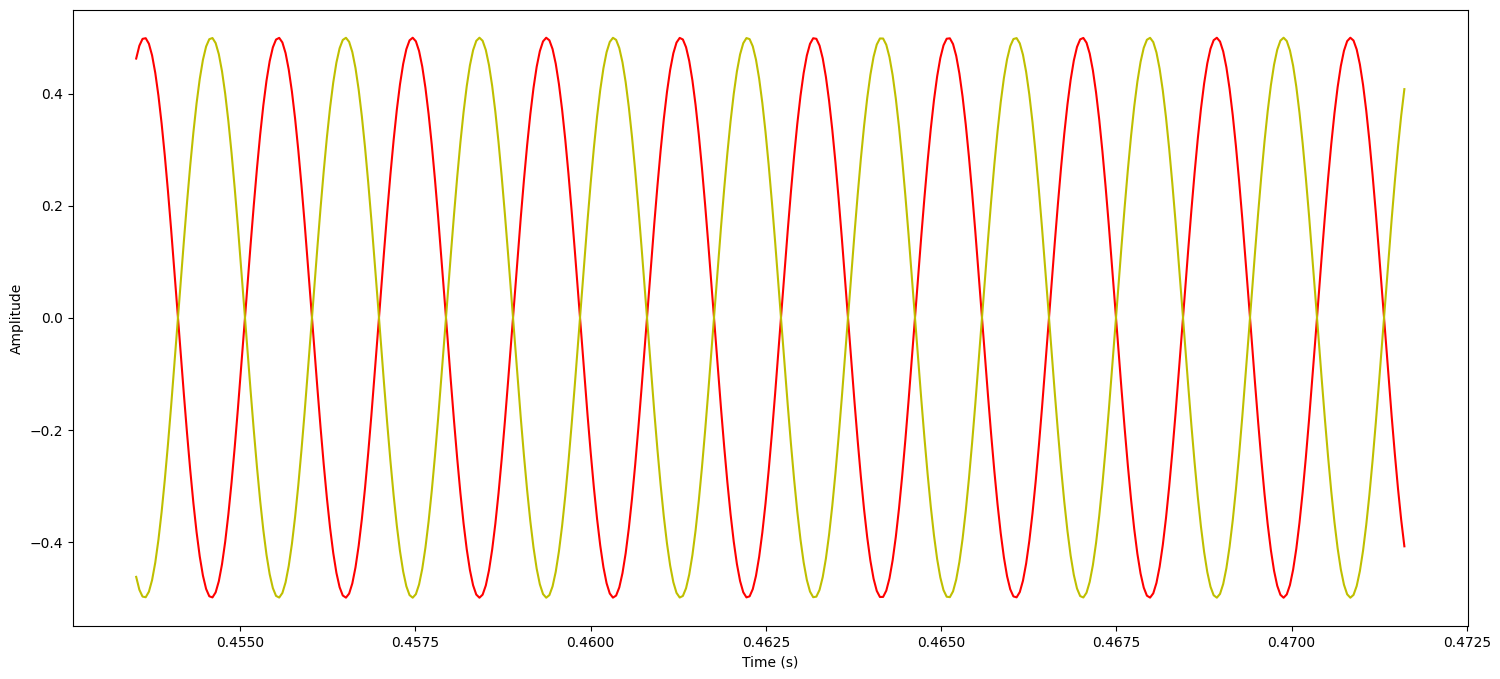

In [15]:
plt.figure(figsize=(18, 8))
plt.plot(t[10000:10400], sin[10000:10400], color='r')
plt.plot(t[10000:10400], sin2[10000:10400], color='y')
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.plot()

## Compare signal and sinusoids

[]

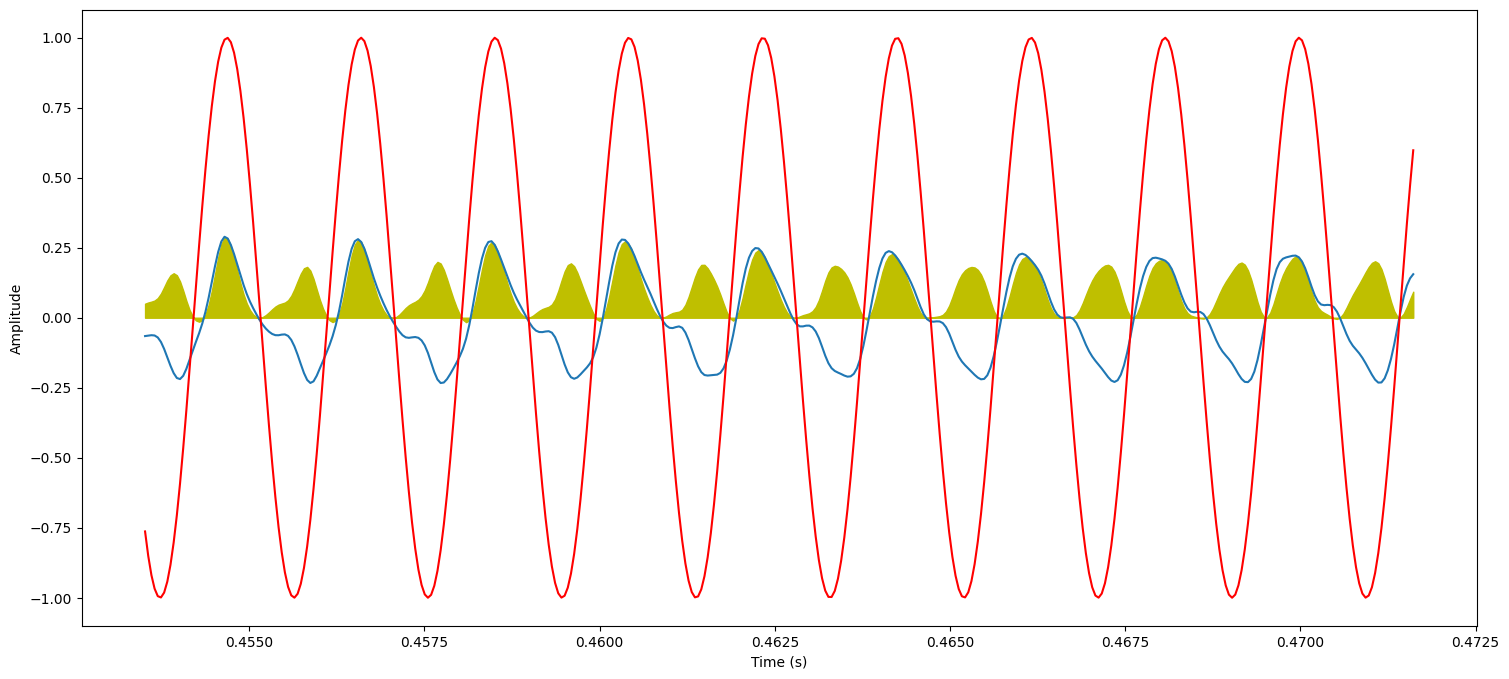

In [16]:
f = 523
phase = 0.55
# phase = 0.05
sin = np.sin(2*np.pi*(f*t-phase))

plt.figure(figsize=(18, 8))
plt.plot(t[10000:10400], signal[10000:10400])
plt.plot(t[10000:10400], sin[10000:10400], color='r')

# 一般来说，两个信号乘积的正面积(或负面积)越大，两个信号的相似度越高
plt.fill_between(t[10000:10400], sin[10000:10400]*signal[10000:10400], color='y')

plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.plot()

上图证明：**高的"magnitude"**意味着原始时域信号和该正弦波 (基波) 之间有**更高的相似度**

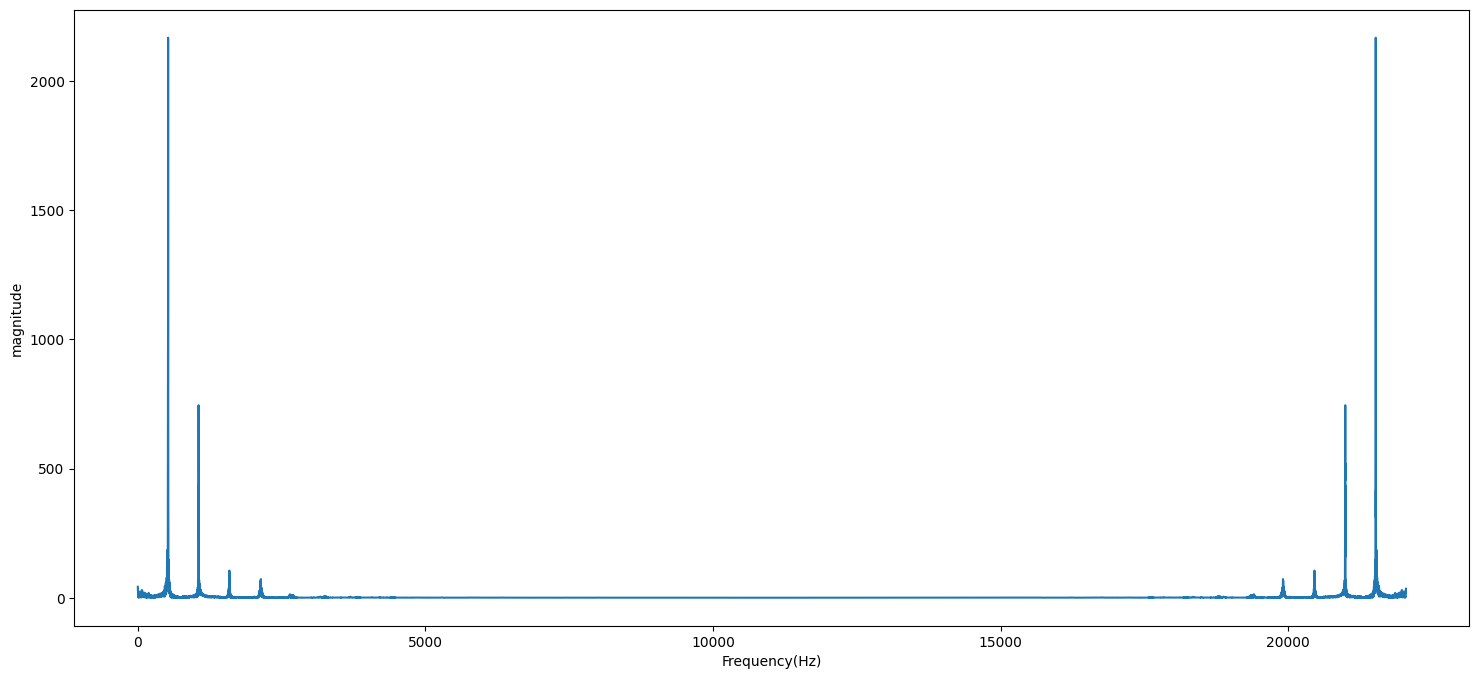

In [17]:
plt.figure(figsize=(18, 8))
plt.plot(frequency, magnitude)
plt.xlabel("Frequency(Hz)")
plt.ylabel("magnitude")
plt.show()

疑问：

3. 为什么上面的频谱图是**对称**的？
   
   - 答：频谱$\hat{x}(k)$满足共轭对称性，即$\hat{x}(k)=\hat{x}^*(N-k)$；因此振幅谱$|\hat{x}(k)|$关于$k=\frac{N}{2}$圆周偶对称，相位谱$\varphi(k)$关于$k=\frac{N}{2}$圆周奇对称。
  
     这意味着，我们可以做分析的时候会**把频谱砍掉一半**，一般情况下抛弃后半段。如果**砍半之前**的振幅谱叫**双边振幅谱**。

> 答案对应 [Chapter13 DFT 的笔记](../Chapter13_DiscreteFourierTransform.md)

## Superimposing pure tones

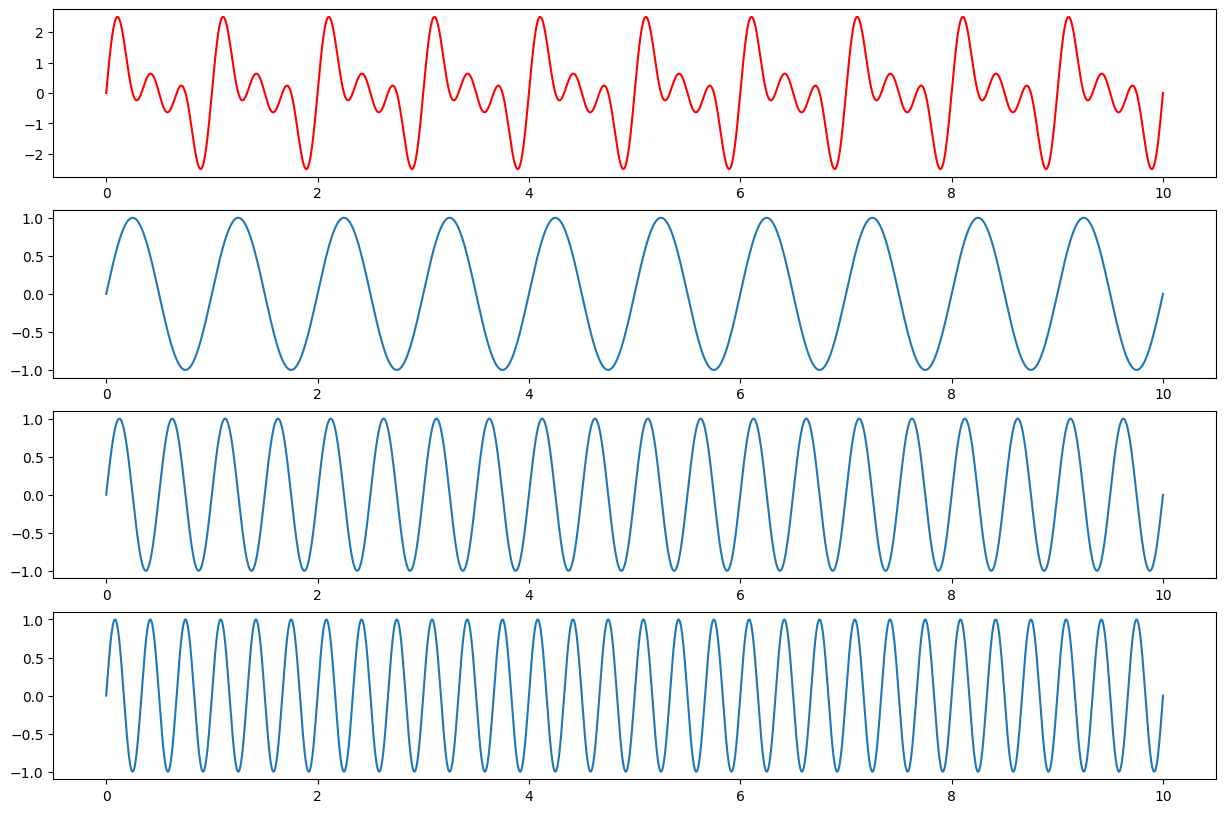

In [18]:
f = 1
t = np.linspace(0, 10, 10000)

sin = np.sin(2*np.pi * (f * t))
sin2 = np.sin(2*np.pi * (2*f * t))
sin3 = np.sin(2*np.pi * (3*f * t))

sum_signal = sin + sin2 + sin3

plt.figure(figsize=(15, 10))

plt.subplot(4, 1, 1)
plt.plot(t, sum_signal, color="r")

plt.subplot(4, 1, 2)
plt.plot(t, sin)

plt.subplot(4, 1, 3)
plt.plot(t, sin2)

plt.subplot(4, 1, 4)
plt.plot(t, sin3)

plt.show()